In [189]:
# import module

import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import datetime
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor

%matplotlib inline

In [190]:
# load data

df_train = pd.read_csv("../data/train.csv")
df_test = pd.read_csv("../data/test.csv")

In [191]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
datetime      10886 non-null object
season        10886 non-null int64
holiday       10886 non-null int64
workingday    10886 non-null int64
weather       10886 non-null int64
temp          10886 non-null float64
atemp         10886 non-null float64
humidity      10886 non-null int64
windspeed     10886 non-null float64
casual        10886 non-null int64
registered    10886 non-null int64
count         10886 non-null int64
dtypes: float64(3), int64(8), object(1)
memory usage: 1020.6+ KB


In [192]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6493 entries, 0 to 6492
Data columns (total 9 columns):
datetime      6493 non-null object
season        6493 non-null int64
holiday       6493 non-null int64
workingday    6493 non-null int64
weather       6493 non-null int64
temp          6493 non-null float64
atemp         6493 non-null float64
humidity      6493 non-null int64
windspeed     6493 non-null float64
dtypes: float64(3), int64(5), object(1)
memory usage: 456.6+ KB


In [193]:
df_train.describe()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
count,10886.000000,10886.000000,10886.000000,10886.000000,10886.00000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000
mean,2.506614,0.028569,0.680875,1.418427,20.23086,23.655084,61.886460,12.799395,36.021955,155.552177,191.574132
std,1.116174,0.166599,0.466159,0.633839,7.79159,8.474601,19.245033,8.164537,49.960477,151.039033,181.144454
min,1.000000,0.000000,0.000000,1.000000,0.82000,0.760000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2.000000,0.000000,0.000000,1.000000,13.94000,16.665000,47.000000,7.001500,4.000000,36.000000,42.000000
50%,3.000000,0.000000,1.000000,1.000000,20.50000,24.240000,62.000000,12.998000,17.000000,118.000000,145.000000
75%,4.000000,0.000000,1.000000,2.000000,26.24000,31.060000,77.000000,16.997900,49.000000,222.000000,284.000000
max,4.000000,1.000000,1.000000,4.000000,41.00000,45.455000,100.000000,56.996900,367.000000,886.000000,977.000000


In [194]:
# reomve outliers ( count )

df_train = df_train[np.abs( df_train["count"] - df_train["count"].mean() ) <= ( 3 * df_train["count"].std() ) ]

In [195]:
# deal with training data

df_train_time = df_train["datetime"].astype("category") # 轉成類別 減少記憶體使用量
df_train_time = pd.to_datetime( df_train_time )

df_train_count = df_train["count"]
df_train.drop( ["count"], axis = 1, inplace = True )

# 將日期切開
df_train["year"] = [d.year for d in df_train_time]
df_train["month"] = [d.month for d in df_train_time]
df_train["day"] = [d.day for d in df_train_time]
df_train["hour"] = [d.hour for d in df_train_time]
df_train["weekday"] = [d.weekday() for d in df_train_time]
df_train["count"] = df_train_count

In [196]:
# one hot encoding ( for training data )

# deal with season
# in order to let season be numerical
train_season = df_train["season"]
df_train["season"] = df_train.season.map( { 1: "Spring", 2 : "Summer", 3 : "Fall", 4 : "Winter" } )
onehot_encoding_season = pd.get_dummies( df_train["season"] )
df_train.drop( ["season"], axis = 1, inplace = True )
df_train["season"] = train_season

# concatenate data
df_train = pd.concat( [df_train, onehot_encoding_season], axis = 1 )

In [197]:
# deal with test data


df_test_time = df_test["datetime"].astype("category") # 轉成類別 減少記憶體使用量
df_test_time = pd.to_datetime( df_test_time )

# 將日期切開
df_test["year"] = [d.year for d in df_test_time]
df_test["month"] = [d.month for d in df_test_time]
df_test["day"] = [d.day for d in df_test_time]
df_test["hour"] = [d.hour for d in df_test_time]
df_test["weekday"] = [d.weekday() for d in df_test_time]

In [198]:
# one hot encoding ( for test data )

# deal with season
# in order to let season be numerical
test_season = df_test["season"]
df_test["season"] = df_test.season.map({ 1 : "Spring", 2 : "Summer", 3 : "Fall", 4 : "Winter" } )
onehot_encoding_season = pd.get_dummies( df_test["season"] )
df_test.drop( ["season"], axis = 1, inplace = True )
df_test["season"] = test_season

# concatenate data
df_test = pd.concat( [df_test, onehot_encoding_season], axis = 1 )

C:\Users\user\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


[Text(0.5, 0, 'hour'), Text(0.5, 1.0, 'Distribution of hour')]

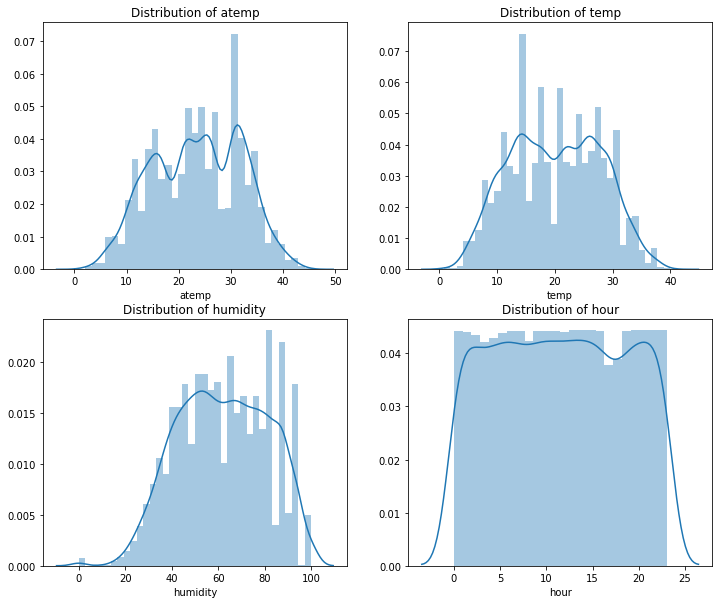

In [199]:
# show Distribution of main features

fig, axes = plt.subplots( nrows = 2, ncols = 2 )

fig.set_size_inches(12, 10)

sns.distplot( df_train["atemp"], ax = axes[0][0] )
sns.distplot( df_train["temp"], ax = axes[0][1] )
sns.distplot( df_train["humidity"], ax = axes[1][0] )
sns.distplot( df_train["hour"], ax = axes[1][1] )


axes[0,0].set( xlabel = "atemp", title = "Distribution of atemp" )
axes[0,1].set( xlabel = "temp", title = "Distribution of temp" )
axes[1,0].set( xlabel = "humidity", title = "Distribution of humidity" )
axes[1,1].set( xlabel = "hour", title = "Distribution of hour")

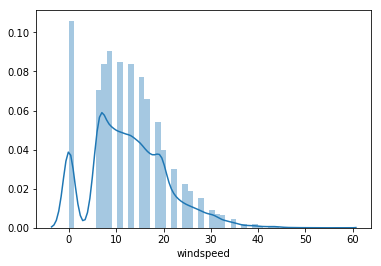

In [200]:
sns.distplot( df_train["windspeed"] )

C:\Users\user\Anaconda3\lib\site-packages\pandas\core\indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s
C:\Users\user\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


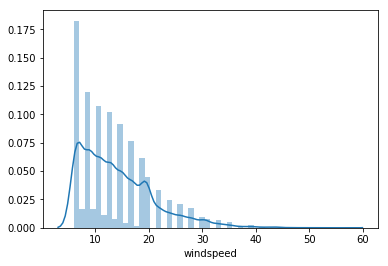

In [201]:
# retain windspeed ( training data )

train_windspeed_not_zero = df_train[df_train["windspeed"] != 0]
train_windspeed_is_zero = df_train[df_train["windspeed"] == 0]

# RandomForest model
forest = RandomForestRegressor( n_estimators = 1000, n_jobs = 4 )

training_feature = ["humidity", "month", "Spring", "atemp", "Fall"
                     , "hour", "Winter", "temp", "day", "year"]

forest.fit( train_windspeed_not_zero[training_feature], train_windspeed_not_zero["windspeed"] )

# predict new windspeed value
predict_windspeed = forest.predict( train_windspeed_is_zero[training_feature] )

train_windspeed_is_zero.loc[:, "windspeed"] = predict_windspeed

df_train = train_windspeed_not_zero.append( train_windspeed_is_zero )

# reset index
df_train.reset_index( inplace = True )
df_train.drop( "index", inplace = True, axis = 1 )

sns.distplot( df_train["windspeed"] )

In [202]:
# retain windspeed ( test data )

test_windspeed_not_zero = df_test[df_test["windspeed"] != 0]
test_windspeed_is_zero = df_test[df_test["windspeed"] == 0]

# RandomForest model
forest = RandomForestRegressor( n_estimators = 1000, n_jobs = 4 )
forest.fit( test_windspeed_not_zero[training_feature], test_windspeed_not_zero["windspeed"] )

# predict new windspeed value
predict_windspeed = forest.predict( test_windspeed_is_zero[training_feature] )

test_windspeed_is_zero.loc[:, "windspeed"] = predict_windspeed

df_test = test_windspeed_not_zero.append( test_windspeed_is_zero )

# reset index
df_test.reset_index( inplace = True )
df_test.drop( "index", inplace = True, axis = 1 )

C:\Users\user\Anaconda3\lib\site-packages\pandas\core\indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


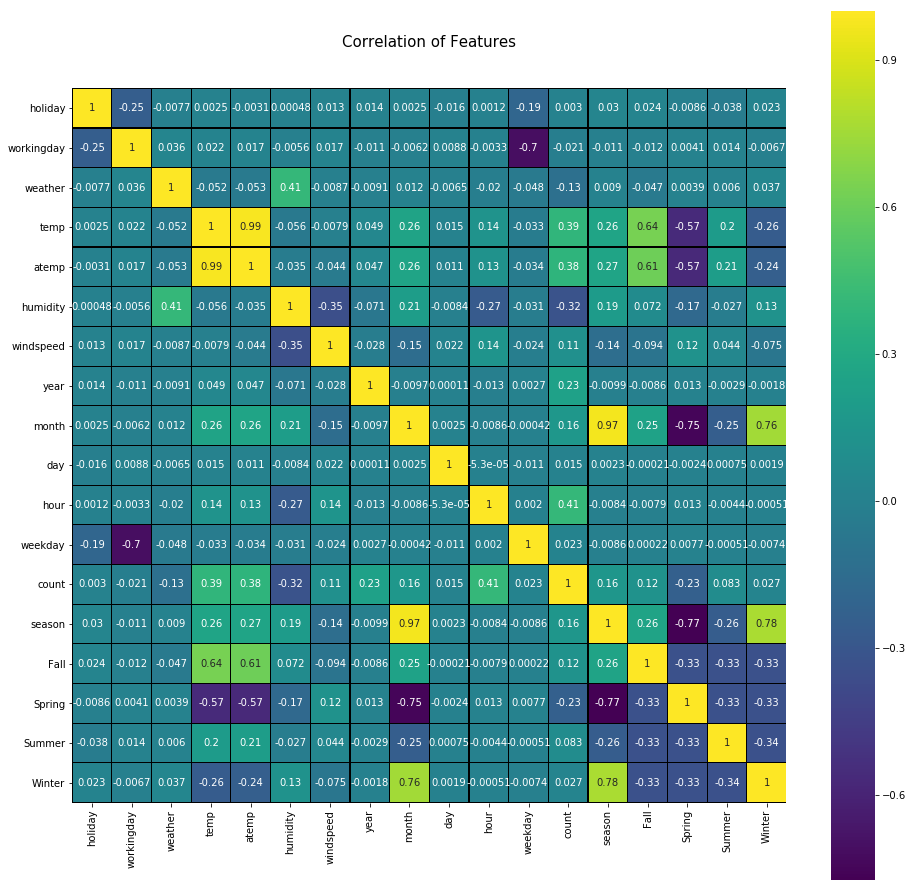

In [203]:
# show Correlation

colormap = plt.cm.viridis
drop_column = [ "datetime", "casual", "registered" ]
corrmap = df_train.drop( drop_column, axis = 1 ).corr()

plt.figure( figsize = ( 16, 16 ) )
plt.title( "Correlation of Features", y = 1.05, size = 15, color = "black")
sns.heatmap( corrmap, linewidths = 0.1
            , vmax = 1.0, square = True, cmap = colormap, linecolor = "black", annot = True )
plt.show()

<BarContainer object of 17 artists>

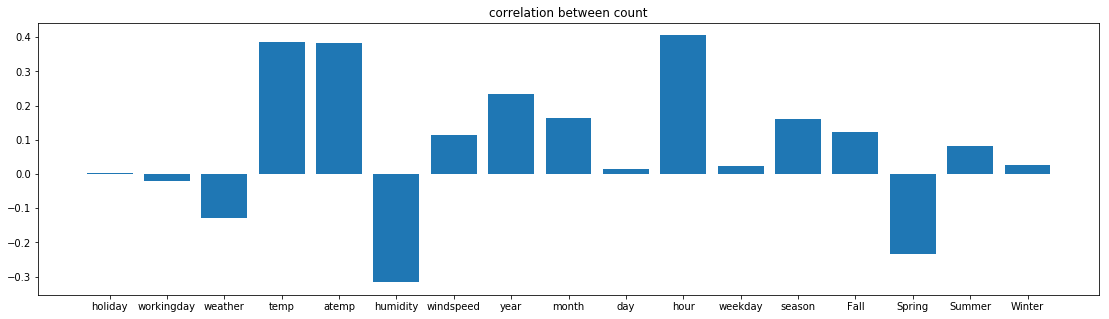

In [204]:
# show correlation features v.s. count

drop_column = [ "datetime", "casual", "registered" ]

correlation = df_train.drop(drop_column, axis = 1).corr()

drop_column = [ "datetime", "casual", "registered", "count" ]

x = df_train.columns.drop(drop_column)
y = correlation["count"].drop("count")

ax = plt.subplots( figsize = (19, 5) )
plt.title( "correlation between count" )
plt.bar(x, y)

In [205]:
# remove low correlation ( training data )

train_dropfeatures = [ "datetime", "casual", "registered", "holiday", "day" ]

df_train.drop( train_dropfeatures, axis = 1, inplace = True )

In [206]:
# remove low correlation ( test data )

test_dropfeatures = [ "datetime", "holiday", "day" ]

test_datetime = df_test["datetime"]
df_test.drop( test_dropfeatures, axis = 1, inplace = True )

C:\Users\user\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


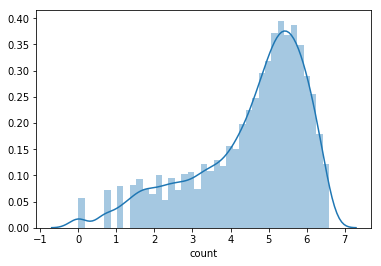

In [207]:
# use log

df_train["count"] = np.log( df_train["count"] )
sns.distplot( df_train["count"] )

In [208]:
# split feature and label

X = df_train.drop(["count"], 1)
Y = df_train["count"]

In [209]:
# train model

forest = GradientBoostingRegressor( n_estimators = 5000, alpha = 0.01 )
forest.fit( X, Y )
prediction = forest.predict( df_test )

In [210]:
# output prediction

output_file = pd.DataFrame( { "datetime": test_datetime, "count": [max(0, x) for x in np.exp( prediction) ] } )
output_file.to_csv( "final.csv", index = False )